In [25]:
import pandas as pd
import numpy as np

In [26]:
data=pd.read_csv("diabetes.csv")

In [27]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [29]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [31]:
# Check for missing values
print(data.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


 Check Data Distribution

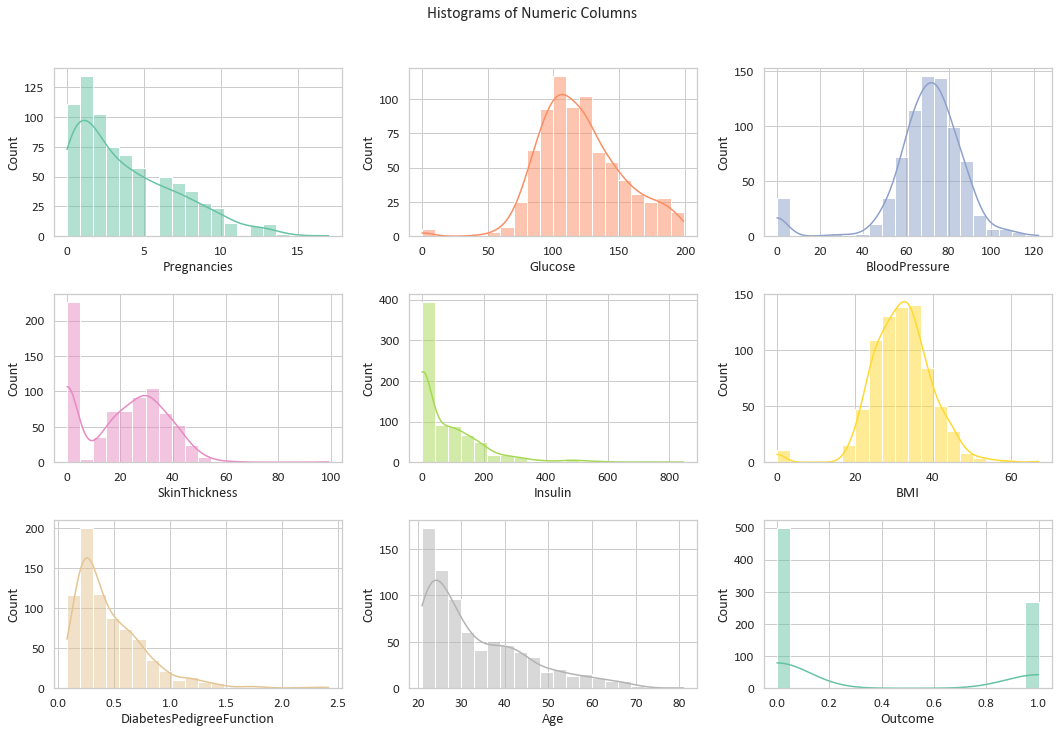

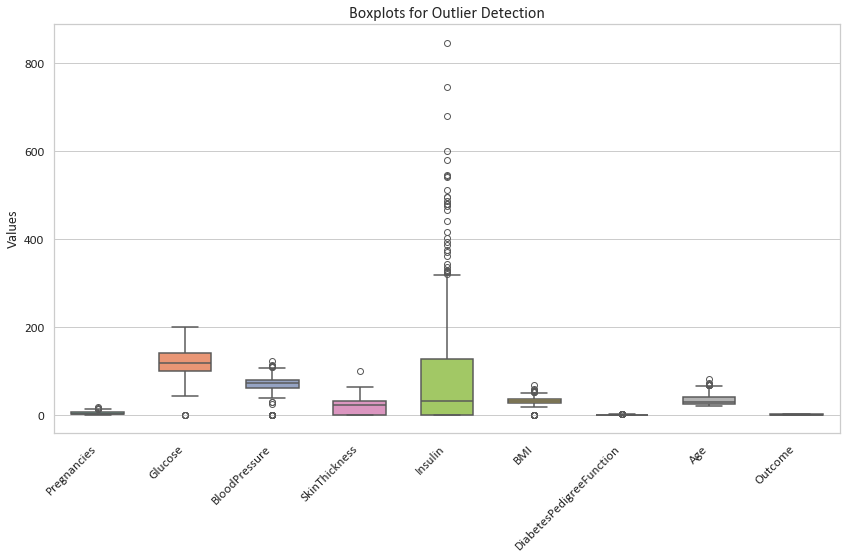

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid", palette="Set2", font="Calibri", font_scale=1.2)
palette = sns.color_palette("Set2", n_colors=len(data.columns))
plt.figure(figsize=(15, 10))
for i, (column_name, column_data) in enumerate(data.items(), start=1):  
    plt.subplot((len(data.columns) + 2) // 3, 3, i) 
    sns.histplot(column_data, bins=20, kde=True, color=palette[i - 1])
    # plt.title(column_name, fontsize=12)  
plt.suptitle("Histograms of Numeric Columns", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
sns.boxplot(data=data, palette="Set2", width=0.6, linewidth=1.5)
plt.title("Boxplots for Outlier Detection", fontsize=16)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Values")
plt.tight_layout();
plt.show();


Correlation Analysis

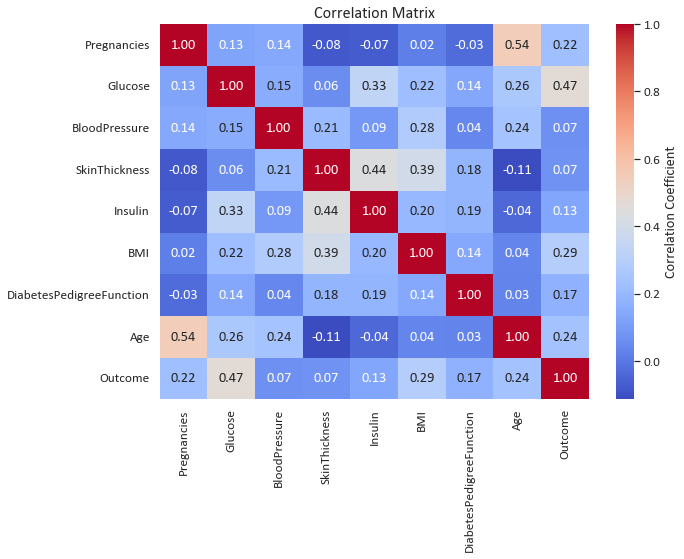

In [33]:

sns.set_theme(style="whitegrid", palette="Set2", font="Calibri", font_scale=1.2)

plt.figure(figsize=(10, 8))
corr_matrix = data.corr()  # Calculate correlation
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()

Data Cleaning and Preprocessing

In [34]:
# Replace zeros in critical columns with NaN
columns_to_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[columns_to_clean] = data[columns_to_clean].replace(0, np.nan)

# Fill missing values with median or mean
for col in columns_to_clean:
    data[col].fillna(data[col].median(), inplace=True)


 Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical columns
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(columns='Outcome'))
scaled_data = pd.DataFrame(scaled_features, columns=data.columns[:-1])
scaled_data['Outcome'] = data['Outcome']


Split the Data

In [36]:
from sklearn.model_selection import train_test_split

X = scaled_data.drop(columns='Outcome')
y = scaled_data['Outcome']

# Train-test split (80-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Model Building

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import joblib

 Logistic Regression

In [38]:

# Train Logistic Regression model
LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

# Predictions
y_LR_pred = LR_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_LR_pred))
print(classification_report(y_test, y_LR_pred))


Accuracy: 0.7077922077922078
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [39]:

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 Decision Tree

In [40]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions
y_dt_pred = dt_model.predict(X_test_scaled)

# Evaluate the model
print("Decision Tree Accuracy:", accuracy_score(y_test, y_dt_pred))
print(classification_report(y_test, y_dt_pred))


Decision Tree Accuracy: 0.6818181818181818
              precision    recall  f1-score   support

           0       0.74      0.79      0.76       100
           1       0.55      0.48      0.51        54

    accuracy                           0.68       154
   macro avg       0.65      0.64      0.64       154
weighted avg       0.67      0.68      0.68       154



Random Forest

In [41]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_rf_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_rf_pred))
print(classification_report(y_test, y_rf_pred))


Random Forest Accuracy: 0.7792207792207793
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



 K-Nearest Neighbors (KNN)

In [42]:
# Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)

# Make predictions
y_knn_pred = knn_model.predict(X_test_scaled)

# Evaluate the model
print("KNN Accuracy:", accuracy_score(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))


KNN Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       100
           1       0.66      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



Support Vector Machine (SVM)

In [43]:
# Train SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_svm_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
print("SVM Accuracy:", accuracy_score(y_test, y_svm_pred))
print(classification_report(y_test, y_svm_pred))


SVM Accuracy: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       100
           1       0.65      0.56      0.60        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.74      0.73       154



Model Evaluation: Confusion Matrix and ROC-AUC

In [45]:

# Confusion Matrix for Logistic Regression
print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_LR_pred))

# Confusion Matrix for Decision Tree
print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_dt_pred))

# Confusion Matrix for Random Forest
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_rf_pred))

# Confusion Matrix for KNN
print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, y_knn_pred))

# Confusion Matrix for SVM
print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_svm_pred))



Logistic Regression Confusion Matrix:
[[82 18]
 [27 27]]
Decision Tree Confusion Matrix:
[[79 21]
 [28 26]]
Random Forest Confusion Matrix:
[[87 13]
 [21 33]]
KNN Confusion Matrix:
[[83 17]
 [21 33]]
SVM Confusion Matrix:
[[84 16]
 [24 30]]


 Compute ROC-AUC for Each Model

In [46]:
from sklearn.metrics import roc_curve, auc

In [47]:
# ROC-AUC for Logistic Regression
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, LR_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

print("Logistic Regression ROC-AUC:", roc_auc_logreg)


Logistic Regression ROC-AUC: 0.8127777777777777


In [48]:
# ROC-AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

print("Decision Tree ROC-AUC:", roc_auc_dt)


Decision Tree ROC-AUC: 0.6357407407407407


In [49]:
# ROC-AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

print("Random Forest ROC-AUC:", roc_auc_rf)


Random Forest ROC-AUC: 0.8178703703703704


In [50]:
# ROC-AUC for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

print("KNN ROC-AUC:", roc_auc_knn)


KNN ROC-AUC: 0.7886111111111112


In [51]:
# ROC-AUC for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test_scaled)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

print("SVM ROC-AUC:", roc_auc_svm)


SVM ROC-AUC: 0.7963888888888889


<ipython-input-53-88568a0f2da2>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid');


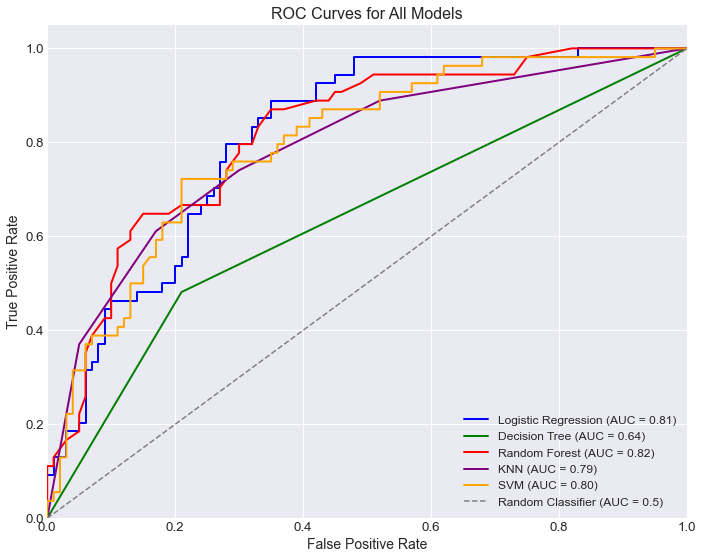

In [53]:
plt.style.use('seaborn-darkgrid');

# Plotting ROC curves
plt.figure(figsize=(10, 8))

# Plot each model's ROC curve with its AUC score in the label
plt.plot(fpr_logreg, tpr_logreg, color='blue', linewidth=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logreg)
plt.plot(fpr_dt, tpr_dt, color='green', linewidth=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)
plt.plot(fpr_rf, tpr_rf, color='red', linewidth=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot(fpr_knn, tpr_knn, color='purple', linewidth=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot(fpr_svm, tpr_svm, color='orange', linewidth=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)

# Add the diagonal line (Random classifier, AUC = 0.5)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier (AUC = 0.5)')

# Set the plot limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curves for All Models', fontsize=16)

# Add a legend
plt.legend(loc="lower right", fontsize=12)

# Show the plot
plt.tight_layout();
plt.show();


Save the Models

In [55]:
# import pickle

# # Save Logistic Regression model
# with open('logreg_model.pkl', 'wb') as f:
#     pickle.dump(LR_model, f)

# # Save Decision Tree model
# with open('dt_model.pkl', 'wb') as f:
#     pickle.dump(dt_model, f)

# # Save Random Forest model
# with open('rf_model.pkl', 'wb') as f:
#     pickle.dump(rf_model, f)

# # Save KNN model
# with open('knn_model.pkl', 'wb') as f:
#     pickle.dump(knn_model, f)

# # Save SVM model
# with open('svm_model.pkl', 'wb') as f:
#     pickle.dump(svm_model, f)


Cross-Validation for Model Evaluation

In [63]:
import pickle
import joblib

# Load the Logistic Regression model
with open('logreg_model.pkl', 'rb') as f:
    loaded_logreg_model = pickle.load(f)

# Load the Decision Tree model
with open('dt_model.pkl', 'rb') as f:
    loaded_dt_model = pickle.load(f)
   


In [65]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
logreg_cv_scores = cross_val_score(loaded_logreg_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Logistic Regression Cross-Validation Scores: {logreg_cv_scores}')
print(f'Mean Cross-Validation Accuracy: {logreg_cv_scores.mean()}\n')

# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(loaded_dt_model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Decision Tree Cross-Validation Scores: {dt_cv_scores}')
print(f'Mean Cross-Validation Accuracy: {dt_cv_scores.mean()}')


Logistic Regression Cross-Validation Scores: [0.7804878  0.7804878  0.76422764 0.7804878  0.80327869]
Mean Cross-Validation Accuracy: 0.7817939490870318

Decision Tree Cross-Validation Scores: [0.68292683 0.65853659 0.69918699 0.70731707 0.70491803]
Mean Cross-Validation Accuracy: 0.6905771024923364
